TP DE MACHINE LEARNING !!!

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VISUALISATION DES DONNEES

In [596]:
import numpy as np
import matplotlib.pyplot as plt

d=[df["alcohol"],df["quality"]]
x=[]


xinit=np.transpose(np.matrix(d))
print(xinit)
y=[]
y_simpl=[]

for loop in range(len(xinit)):
    if loop%10==0:
        x.append([xinit[loop,0],xinit[loop,1]])
        #on considère comme bon un vin dont alcohol + qualité^2 > 11+5^2
        if(1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,1]>11+5*5 ):
            y_simpl.append(1)
        else:
            y_simpl.append(0)
        
        if(not ((1.2*xinit[loop,0]+xinit[loop,1]*xinit[loop,0]>40+5*5 
           and xinit[loop,0]<=12)
           and  xinit[loop,1]>5 )):
            y.append(1)
        else:
            y.append(0)

x=np.array(x)
print(len(x))
print(y) 

[[ 9.4  5. ]
 [ 9.8  5. ]
 [ 9.8  5. ]
 ...
 [10.5  5. ]
 [11.2  6. ]
 [10.2  5. ]]
115
[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]


In [350]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,0])
            pos.append(X[loop,1])
        else:
            idneg.append(X[loop,0])
            neg.append(X[loop,1])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

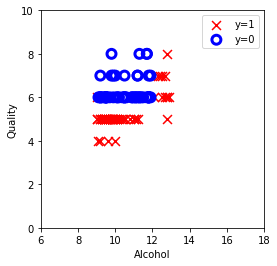

In [597]:


fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')

plt.show()

LOGISTIC REGRESSION


In [172]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

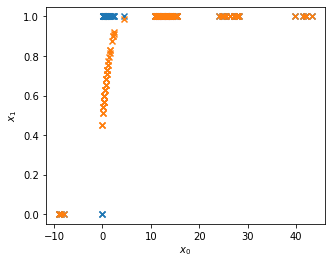

In [233]:
x_plot=[]
for loop in range(len(x)):
    x_plot.append(1.2*x[loop,0]+x[loop,1]*x[loop,1]-(11+5*5))
x_plot=np.asarray(x_plot)
xf=np.copy(x)
for loop in range(len(x)):
    xf[loop,1]=x[loop,1]*x[loop,1]

y_train = y_simpl

w_in = np.array([1.2,1])
                 
b_in = -36

z=np.dot(xf,w_in) +b_in

fig,ax = plt.subplots(1,1,figsize=(5,4))

ax.scatter(x_plot,y_train,marker="x")
ax.scatter(x_plot,sigmoid(z),marker="x")
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()



BOUNDARY

[   0    1    2 ... 1197 1198 1199]


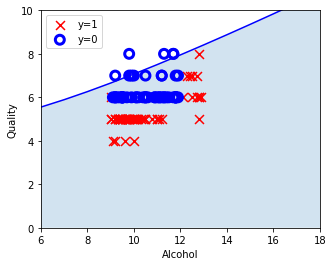

In [598]:
# Choose values between 0 and 6
x0 = np.arange(1200)
print(x0)
import math
#1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5
#ici b=-11+5*5 w0 = 1,2 w1=1
x1 = np.sqrt(20+x0*x0*0.3)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([6, 18, 0, 10])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel('Quality')
ax.set_xlabel('Alcohol')
plt.show()

, Logistic Loss

In [599]:
import copy


def compute_cost_logistic(X, y, w, b):
    m, n = X.shape

   ### START CODE HERE ###
    loss_sum = 0 

   # Loop over each training example
    for i in range(m): 

       # First calculate z_wb = w[0]*X[i][0]+...+w[n-1]*X[i][n-1]+b
        z_wb = 0 
       # Loop over each feature
        for j in range(n): 
           # Add the corresponding term to z_wb
             z_wb_ij = z_wb_ij = w[j]*X[i][j]
             z_wb += z_wb_ij # equivalent to z_wb = z_wb + z_wb_ij
       # Add the bias term to z_wb
        z_wb += b # equivalent to z_wb = z_wb + b

        f_wb = f_wb = sigmoid(z_wb)
        loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)

        loss_sum += loss # equivalent to loss_sum = loss_sum + loss

    total_cost = (1 / m) * loss_sum  
   ### END CODE HERE ### 

    return total_cost


def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw 

def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing 

TEST GRADIENT DESCENT

In [600]:
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [601]:
X_train=np.copy(x)
y_train=np.copy(y)
print("Original shape of data:", X_train.shape)
print("Original shape of y:", y_train.shape)
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", X_mapped.shape)
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", X_mapped[0])

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_logistic(X_mapped, y_train, initial_w, initial_b)

print(" cost :", cost)


Original shape of data: (115, 2)
Original shape of y: (115,)
Shape after feature mapping: (115, 27)
X_train[0]: [9.4 5. ]
mapped X_train[0]: [9.40000000e+00 5.00000000e+00 8.83600000e+01 4.70000000e+01
 2.50000000e+01 8.30584000e+02 4.41800000e+02 2.35000000e+02
 1.25000000e+02 7.80748960e+03 4.15292000e+03 2.20900000e+03
 1.17500000e+03 6.25000000e+02 7.33904022e+04 3.90374480e+04
 2.07646000e+04 1.10450000e+04 5.87500000e+03 3.12500000e+03
 6.89869781e+05 3.66952011e+05 1.95187240e+05 1.03823000e+05
 5.52250000e+04 2.93750000e+04 1.56250000e+04]
 cost : nan


/tmp/ipykernel_70073/291776554.py:24: RuntimeWarning: divide by zero encountered in log
  loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
/tmp/ipykernel_70073/291776554.py:24: RuntimeWarning: invalid value encountered in multiply
  loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)


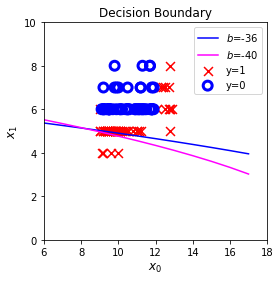

In [602]:
import matplotlib.pyplot as plt

# Choose values between 0 and 6
x0 = np.arange(0,18)

# Plot the two decision boundaries
x1 = np.sqrt(36-x0*1.2)
x1_other = np.sqrt(36-x0*1.65839314)/0.92518989

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c="blue", label="$b$=-36")
ax.plot(x0,x1_other, c="magenta", label="$b$=-40")
ax.axis([6, 18, 0, 10])

# Plot the original data
plot_data(x,y_train,ax)
ax.axis([6, 18, 0, 10])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()




In [603]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)                 
    sigma  = np.std(X, axis=0)                  
    X_norm = np.array((X - mu) / sigma)
    print(X_norm)
    return (X_norm, mu, sigma)

In [604]:
X_mapped, mu, sigma = zscore_normalize_features(map_feature(X_train[:, 0], X_train[:, 1]))
X_mapped2 = map_feature(X_train[:, 0], X_train[:, 1])
print( X_mapped)
#print(X_mapped2)
#print(X_train)

np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_logistic(X_mapped, y_train, initial_w, initial_b)

print(f"dj_db: {dj_db}", )
print(f"First few elements of dj_dw:\n {dj_dw[:4].tolist()}", )

[[-0.93588038 -0.8293368  -0.90800369 ... -0.74519624 -0.68336046
  -0.62195686]
 [-0.48271725 -0.8293368  -0.50415294 ... -0.69473199 -0.66379897
  -0.62195686]
 [-0.93588038 -0.8293368  -0.90800369 ... -0.74519624 -0.68336046
  -0.62195686]
 ...
 [-1.11714563 -0.8293368  -1.06368502 ... -0.76464981 -0.69118505
  -0.62195686]
 [ 1.32993528  0.31974431  1.32049916 ...  0.32831949  0.10735418
  -0.05866467]
 [ 0.06107851 -0.8293368   0.00808884 ... -0.63072345 -0.64032519
  -0.62195686]]
[[-0.93588038 -0.8293368  -0.90800369 ... -0.74519624 -0.68336046
  -0.62195686]
 [-0.48271725 -0.8293368  -0.50415294 ... -0.69473199 -0.66379897
  -0.62195686]
 [-0.93588038 -0.8293368  -0.90800369 ... -0.74519624 -0.68336046
  -0.62195686]
 ...
 [-1.11714563 -0.8293368  -1.06368502 ... -0.76464981 -0.69118505
  -0.62195686]
 [ 1.32993528  0.31974431  1.32049916 ...  0.32831949  0.10735418
  -0.05866467]
 [ 0.06107851 -0.8293368   0.00808884 ... -0.63072345 -0.64032519
  -0.62195686]]
dj_db: 0.0568724

GRADIENT DESCENT APPLICATION

In [605]:

np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Some gradient descent settings
iterations = 10000
alpha = 0.2

w,b, J_history = gradient_descent(X_mapped, y_train, initial_w, initial_b, alpha, iterations)

Iteration    0: Cost 0.6426413743536642   
Iteration 1000: Cost 0.10041124563794107   
Iteration 2000: Cost 0.07571539995974721   
Iteration 3000: Cost 0.06433962666685045   
Iteration 4000: Cost 0.05730127707268267   
Iteration 5000: Cost 0.05237509082221383   
Iteration 6000: Cost 0.048669634127746525   
Iteration 7000: Cost 0.045744111541243894   
Iteration 8000: Cost 0.04335230432193219   
Iteration 9000: Cost 0.04134470617143496   


In [590]:
def sig(z):
 
    return 1/(1+np.exp(-z))
def plot_decision_boundary(w, b, X, y):
    # Credit to dibgerge on Github for this plotting code
    fig,ax = plt.subplots(1, 1, figsize=(4,4))
    plot_data(X[:, 0:2], y,ax)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        ax.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-2.5, 2.5, 50)
        print(u)
        v = np.linspace(-4, 4, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        ax.contour(u,v,z, levels = [0.5], colors="g")
    

[-2.5        -2.39795918 -2.29591837 -2.19387755 -2.09183673 -1.98979592
 -1.8877551  -1.78571429 -1.68367347 -1.58163265 -1.47959184 -1.37755102
 -1.2755102  -1.17346939 -1.07142857 -0.96938776 -0.86734694 -0.76530612
 -0.66326531 -0.56122449 -0.45918367 -0.35714286 -0.25510204 -0.15306122
 -0.05102041  0.05102041  0.15306122  0.25510204  0.35714286  0.45918367
  0.56122449  0.66326531  0.76530612  0.86734694  0.96938776  1.07142857
  1.17346939  1.2755102   1.37755102  1.47959184  1.58163265  1.68367347
  1.78571429  1.8877551   1.98979592  2.09183673  2.19387755  2.29591837
  2.39795918  2.5       ]


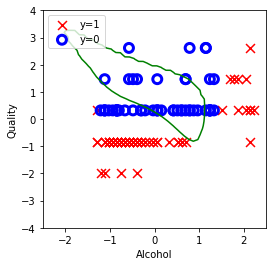

In [606]:
plot_decision_boundary(w, b, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Quality') 
# Set the x-axis label
plt.xlabel('Alcohol') 
plt.legend(loc="upper left")
plt.show()

PREDICT

In [367]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model      
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += X[i,j]*w[j]
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)
        #print(f_wb)
        # Apply the threshold
        if(f_wb>=0.5):
            p[i] = 1.
        else:
            p[i] = 0.
        
    ### END CODE HERE ### 
    return p

In [609]:

#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 99.130435


In [ ]:
REGULARIZATION LAMBDA

In [579]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    n = X.shape[1]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        #cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        if(y[i]==1):
                cost +=  -np.log(f_wb_i)
        elif(y[i]==0):
                cost +=  -np.log(1-f_wb_i)
             
    cost = cost / m
    
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost  
    
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost 
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape

    dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

  ### START CODE HERE ###     
  # Loop over the elements of w
    for j in range(n): 

        dj_dw_j_reg = (lambda_ / m) * w[j]

      # Add the regularization term  to the correspoding element of dj_dw
        dj_dw[j] = dj_dw[j] + dj_dw_j_reg

  ### END CODE HERE ###         

    return dj_db, dj_dw

def gradient_descent_reg(X, y, w_in, b_in, alpha, num_iters,lambda_=0): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_reg(X, y, w, b,lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_reg(X, y, w, b,lambda_) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing

In [610]:
# Initialize fitting parameters
np.random.seed(1)
initial_w2 = np.random.rand(X_mapped.shape[1])-0.5
initial_b2 = 1.

# Set regularization parameter lambda_ (you can try varying this)
lambda_ = 1    

# Some gradient descent settings
iterations2 = 10000
alpha2 = 0.2

w2,b2, J_history2 = gradient_descent_reg(X_mapped, y_train, initial_w2, initial_b2, 
                                    alpha2, iterations2, lambda_)

Iteration    0: Cost 0.6527598799519938   
Iteration 1000: Cost 0.25139188284043124   
Iteration 2000: Cost 0.25113266924176747   
Iteration 3000: Cost 0.2511253473185637   
Iteration 4000: Cost 0.25112512473066584   
Iteration 5000: Cost 0.25112511791204517   
Iteration 6000: Cost 0.25112511770275425   
Iteration 7000: Cost 0.25112511769632595   
Iteration 8000: Cost 0.25112511769612833   
Iteration 9000: Cost 0.25112511769612217   


[-2.5        -2.39795918 -2.29591837 -2.19387755 -2.09183673 -1.98979592
 -1.8877551  -1.78571429 -1.68367347 -1.58163265 -1.47959184 -1.37755102
 -1.2755102  -1.17346939 -1.07142857 -0.96938776 -0.86734694 -0.76530612
 -0.66326531 -0.56122449 -0.45918367 -0.35714286 -0.25510204 -0.15306122
 -0.05102041  0.05102041  0.15306122  0.25510204  0.35714286  0.45918367
  0.56122449  0.66326531  0.76530612  0.86734694  0.96938776  1.07142857
  1.17346939  1.2755102   1.37755102  1.47959184  1.58163265  1.68367347
  1.78571429  1.8877551   1.98979592  2.09183673  2.19387755  2.29591837
  2.39795918  2.5       ]


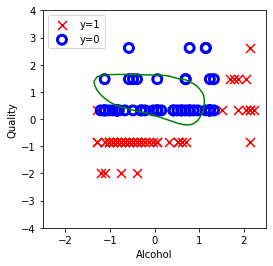

In [613]:

plot_decision_boundary(w2, b2, X_mapped, y_train)
# Set the y-axis label
plt.ylabel('Quality') 
# Set the x-axis label
plt.xlabel('Alcohol') 
plt.legend(loc="upper left")
plt.show()

In [615]:
#Compute accuracy on the training set
p = predict(X_mapped, w2, b2)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 96.521739
